# mtcars 분석

요구사항
- 데이터셋을 분석해서 경제적 가치를 얻을 수 있는 비즈니스 상황 찾아보기
- mtcars에 대한 데이터 분석

사용 툴
- jupyter notebooks
- pandas
- matplotlib

데이터셋 - mtcars
- 차종별 연료소모량, 특징, 성능 등에 대한 데이터
- 총 32종의 데이터가 존재.
- 1973~74년에 만들어진 차량 모델


In [102]:
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
file_path = "../../.files/mtcars.csv"

mtcars = pd.read_csv(file_path)

In [ ]:
mtcars.head()

In [ ]:
mtcars.tail()

In [ ]:
# (32, 12)
# 12 columns, 32 rows
mtcars.shape

(32, 12)

In [ ]:
print(mtcars.columns)

# Modify column names
# 'Unnamed: 0' -> name
mtcars = mtcars.rename(columns = {'Unnamed: 0' : "name"})

In [ ]:
mtcars.info()

In [ ]:
print(mtcars.dtypes)

# am: category type that has two values.
# 0: automatic
# 1: manual
# Change the name more intuitive.
mtcars = mtcars.rename(columns = {"am": "is_manual"})

In [ ]:
mtcars.describe()

### Gear와 Transmission 피처의 unique 값

In [111]:
# How many values in gear, transmission(is_manual in this practice) features

no_gear = mtcars["gear"].unique()
no_transmission = mtcars["is_manual"].unique()

print(f"""Gear's value : {len(no_gear)} - {no_gear},
Transmission's value: {len(no_transmission)} - {no_transmission}
""")

Gear's value : 3 - [4 3 5],
Transmission's value: 2 - [1 0]



In [112]:
gear_transmission_comb = mtcars.groupby(["gear", "is_manual"])["name"].count().reset_index()

In [113]:
print(gear_transmission_comb)

   gear  is_manual  name
0     3          0    15
1     4          0     4
2     4          1     8
3     5          1     5


In [114]:
name = [
    f"{comb[0]} {"man" if comb[1] == 1 else "auto"}"
    for comb in gear_transmission_comb[["gear", "is_manual"]].values
]

values = list(gear_transmission_comb['name'].values)

Text(0, 0.5, '# of Cars')

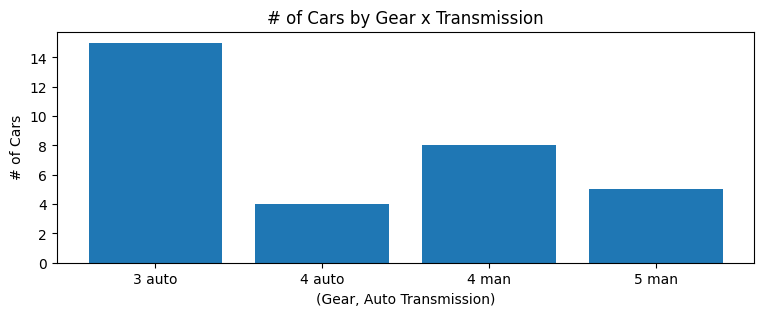

In [115]:
plt.figure(figsize = (9 ,3))

plt.bar(name, values)
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("(Gear, Auto Transmission)")
plt.ylabel("# of Cars")

## Crosstab을 활용해서 카운트하기

In [198]:
gear_transmission_crosstab = pd.crosstab(mtcars["gear"], mtcars["is_manual"])

In [199]:
gear_transmission_crosstab

is_manual,0,1
gear,,
3,15,0
4,4,8
5,0,5


### 각 변수의 히스토그램

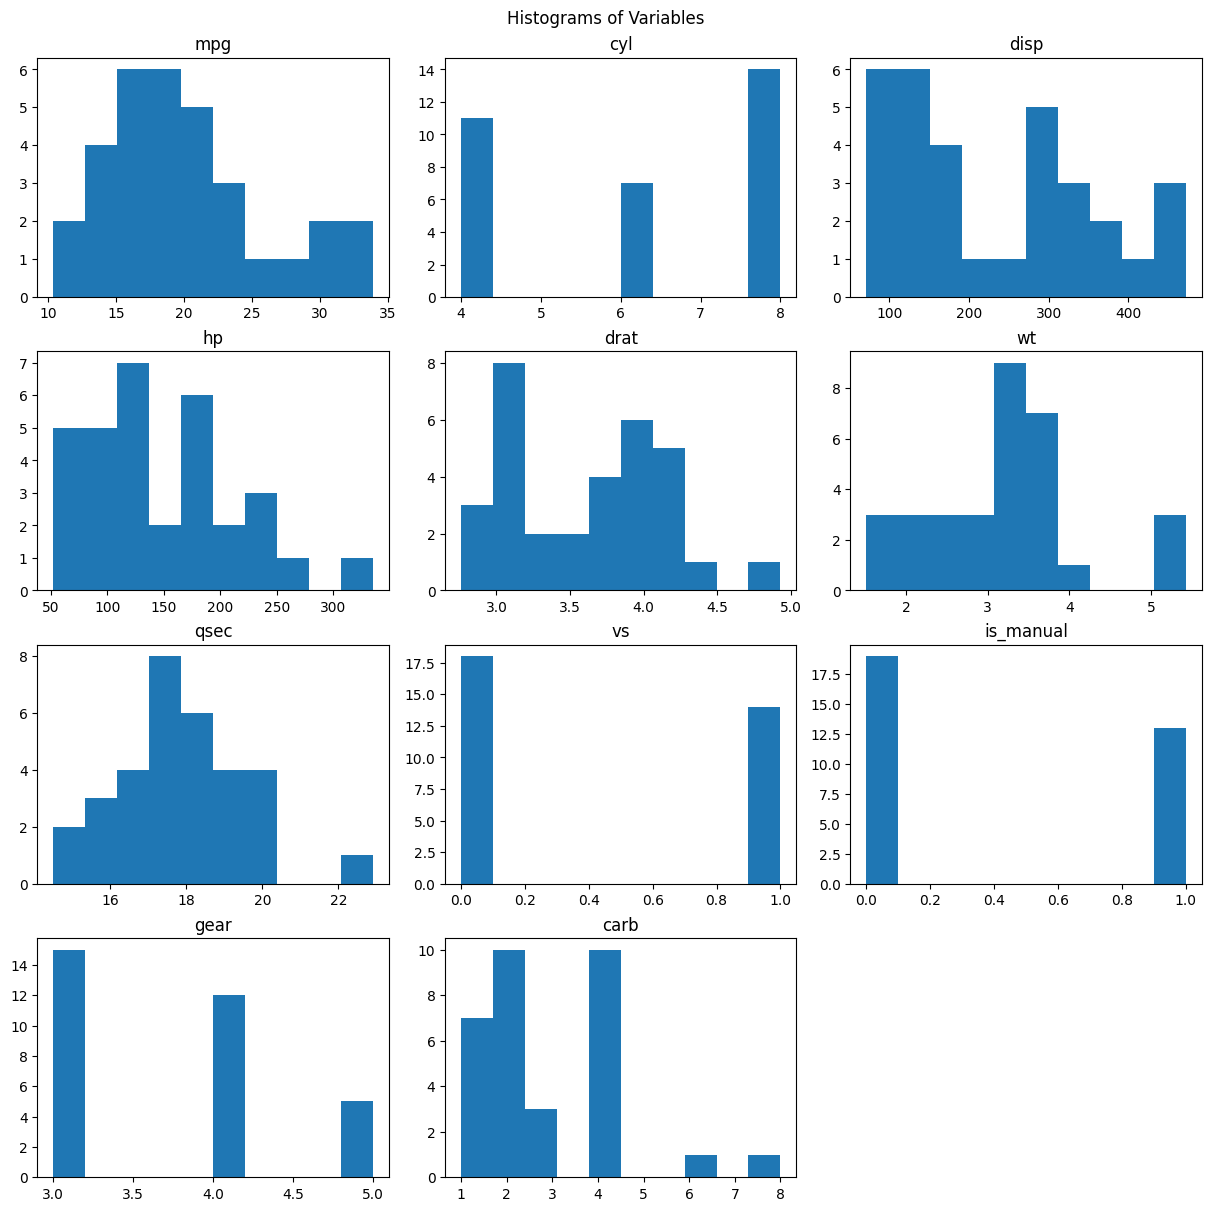

In [ ]:
fig, ax = plt.figure(figsize = (12, 12), layout = 'constrained')

for i in range(1, 12):
    col = mtcars.columns[i]

    plt.subplot(4,3,i)
    plt.hist(mtcars[col])
    plt.title(col)

plt.suptitle("Histograms of Variables")
plt.show()

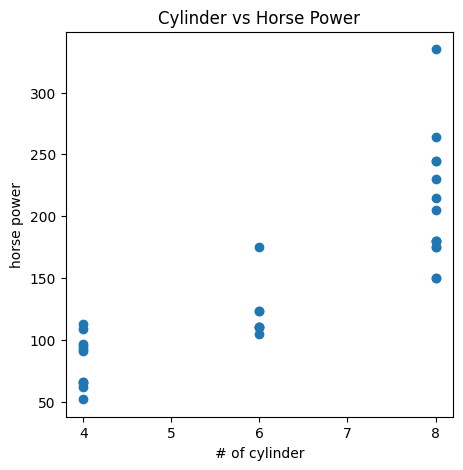

In [ ]:
plt.figure(figsize = (5,5))

plt.scatter(mtcars['cyl'], mtcars['hp'])
plt.title("Cylinder vs Horse Power")
plt.xlabel('# of cylinder')
plt.ylabel('horse power')

# Change to integers
plt.xticks([4,5,6,7,8])
plt.show()

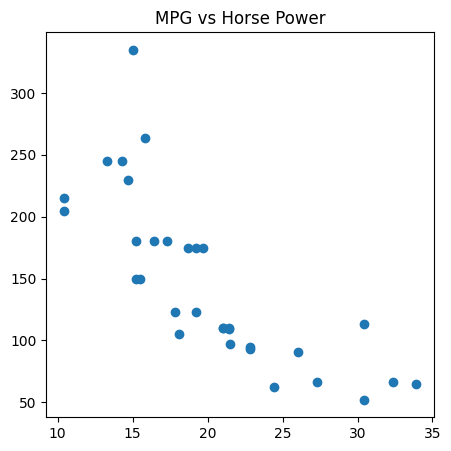

In [203]:
plt.figure(figsize = (5,5))

plt.scatter(mtcars['mpg'], mtcars['hp'])
plt.title("MPG vs Horse Power")
plt.show()

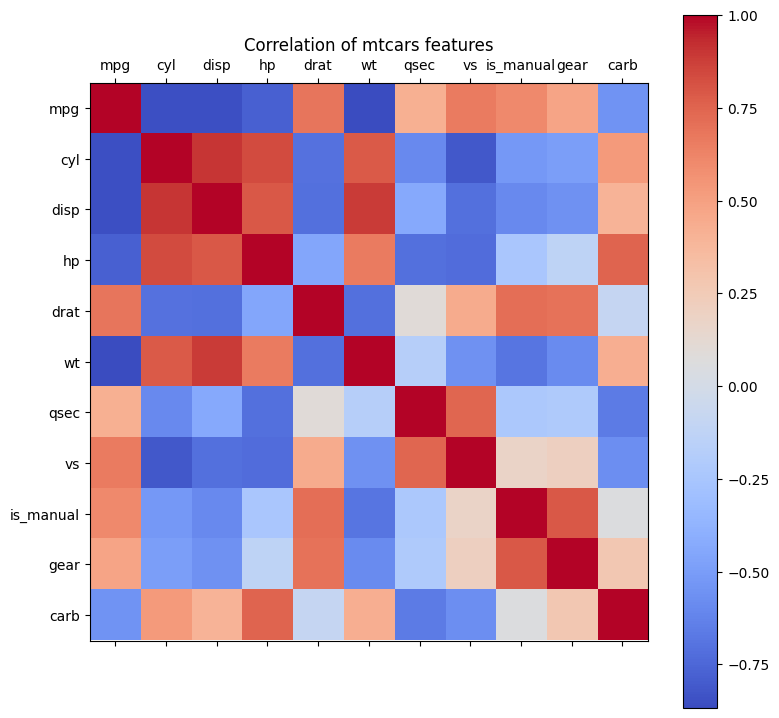

In [ ]:
# Correlation
corr = mtcars.corr(numeric_only = True)

fig, ax = plt.subplots(figsize = (9, 9))
im = ax.matshow(corr,  cmap='coolwarm')
cbar = fig.colorbar(im)

ax.set_xticks(list(range(0, len(corr.columns))))
ax.set_xticklabels(corr.columns)
ax.set_yticks(list(range(0, len(corr.columns))))
ax.set_yticklabels(corr.columns)
ax.set_title("Correlation of mtcars features")
plt.show()

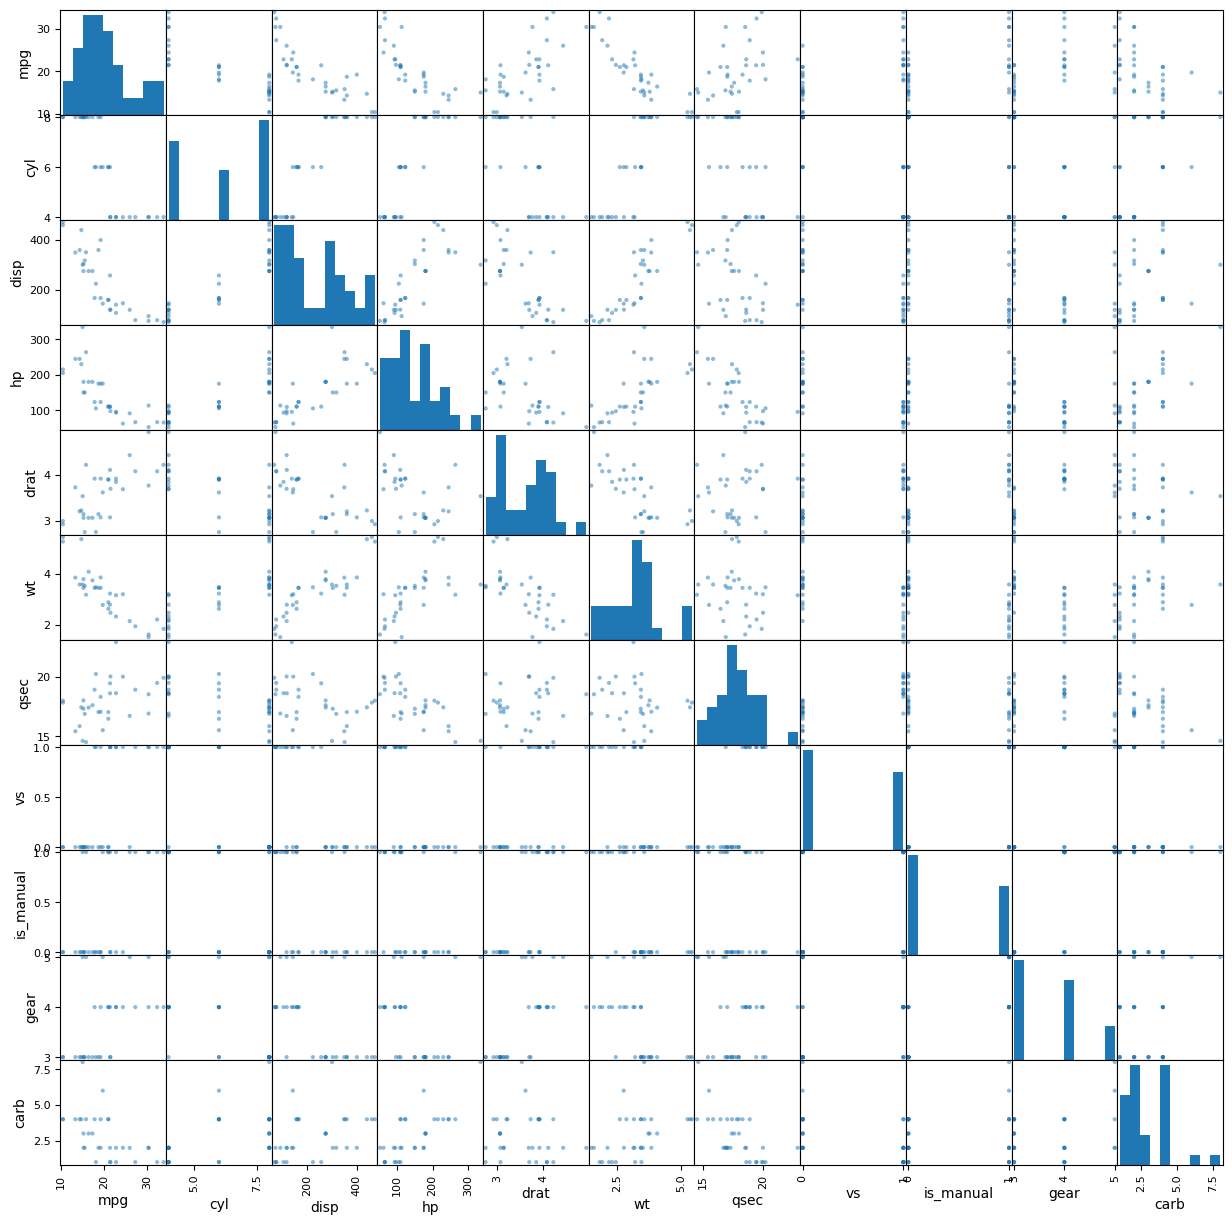

In [214]:
pd.plotting.scatter_matrix(mtcars, figsize = (15,15))
plt.show()

### 차량 데이터가 가치를 갖는 비즈니스 상황

의견
- 레이싱 경기 : 레이싱 경기를 위해 차량을 선택할 때.
- 중고차 : 중고차 스펙을 기본 스펙과 현재 성능을 기반으로 측정.
- 예상성능과 필요부품 예측 : 최소 갯수로 최대 성능을 내는 부품의 조합을 찾는 데 사용할 수 있을 것 같다.
    - 설계적인 측면에서 사용할 수 있는 데이터를 활용해서 차의 컨셉을 유지하면서도, 최소비용으로 부품을 사용하는데 사용할 수 있을 것 같다.

## 차 컨셉에 맞는 목표 성능을 위한 필요부품 예측하기

### 목적
최소 비용으로 차의 컨셉을 만족할 수 있는 부품을 예측하기

### 예시 상황
1. 가성비 차량  : 특정 연비 이하를 만족하면서도 특정 마력 이상을 낼 수 있는 차량.
2. 스포츠카    : 목표 qsec(1/4마일에 도달하는데 걸린 시간)을 만족하는 차량